<a href="https://colab.research.google.com/github/angelesGladin/challenge-data-science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
#lista de las suma de los precios de las tiendas
lista_sumas = [0, 0, 0, 0]

#creación de lista tienda con la suma de esta columna
precios = tienda.iloc[:,2]
lista_sumas[0] = precios.sum()

print(f'Lista de precios de tienda:\n{precios}')
print('La suma total de los precios: ', lista_sumas[0] )

Lista de precios de tienda:
0        164300.0
1        192300.0
2        209600.0
3        757500.0
4        335200.0
          ...    
2354    1284400.0
2355     282800.0
2356     122900.0
2357     691300.0
2358     195000.0
Name: Precio, Length: 2359, dtype: float64
La suma total de los precios:  1150880400.0


In [ ]:
#creación de lista tienda2 con la suma de esta columna
precios2 = tienda2.iloc[:,2]
lista_sumas[1] = precios2.sum()

print(f'Lista de precios de tienda:\n{precios2}')
print('La suma total de los precios: ', lista_sumas[1])

Lista de precios de tienda:
0        283600.0
1         76800.0
2        443300.0
3        906200.0
4        397800.0
          ...    
2354     140300.0
2355    1220100.0
2356     797900.0
2357    2224300.0
2358     551000.0
Name: Precio, Length: 2359, dtype: float64
La suma total de los precios:  1116343500.0


In [ ]:
#creación de lista tienda3 con la suma de esta columna
precios3 = tienda3.iloc[:,2]
lista_sumas[2] = precios3.sum()

print(f'Lista de precios de tienda:\n{precios3}')
print('La suma total de los precios: ', lista_sumas[2])

Lista de precios de tienda:
0       1285100.0
1        290100.0
2        303500.0
3         58800.0
4        521100.0
          ...    
2354      26700.0
2355      31800.0
2356     477100.0
2357     123100.0
2358      63400.0
Name: Precio, Length: 2359, dtype: float64
La suma total de los precios:  1098019600.0


In [ ]:
#creación de lista tienda4 con la suma de esta columna
precios4 = tienda4.iloc[:,2]
lista_sumas[3] = precios4.sum()

print(f'Lista de precios de tienda:\n{precios4}')
print('La suma total de los precios: ', lista_sumas[3])

Lista de precios de tienda:
0       1084800.0
1        473800.0
2         23700.0
3         57700.0
4        138900.0
          ...    
2353     227700.0
2354     342000.0
2355      36700.0
2356     151800.0
2357      11200.0
Name: Precio, Length: 2358, dtype: float64
La suma total de los precios:  1038375700.0


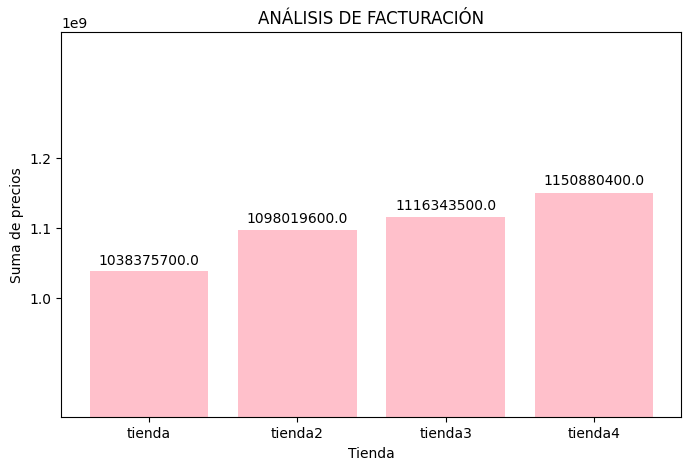

In [ ]:
lista_tienda = ['tienda', 'tienda2', 'tienda3', 'tienda4']

#comparacionde de resultados de los precios de cada tienda
import matplotlib.pyplot as plt

#impresion de grafica

plt.figure(figsize= (8, 5))
plt.bar(lista_tienda, lista_sumas, color ='pink')

plt.title( 'ANÁLISIS DE FACTURACIÓN')
plt.xlabel('Tienda')
plt.ylabel( 'Suma de precios')
plt.ylim(lista_sumas[0] * .8, lista_sumas[3] * 1.2)
plt.yticks([1000000000.0, 1100000000.0, 1200000000.0])

# Mostrar valores encima de cada barra
for i, valor in enumerate( lista_sumas): plt. text(i, valor * 1.01, str(valor), ha= 'center')


# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda